In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd/content/drive/My Drive/Colab Notebooks/csv_practice

/content/drive/My Drive/Colab Notebooks/csv_practice


In [6]:
saldata=pd.read_csv("Salary_Data.csv")
print(saldata)

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


In [7]:
# ASSIGNED X = INDEPENDENT VARIABLE, Y= DEPENDENT VARIABLE

x=saldata.iloc[:,:-1]
y=saldata.iloc[:,1]

In [8]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [9]:
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

In [11]:
# IN LINEAR REGRESSION MODEL WE MAKE THE MACHINE LEARN BY TRAINING IT ON A PART OF A SET OF DATA (TRAIN DATA)
# BY MAKING IT GET THE BEST FIT LINEAR LINE 
# MAKING IT PREDICT THE SECOND PART OF THE SET OF DATA BASED ON THIS LINE
# CHECKING IF THE PREDICTED DATA AND THE ACTUAL SECOND PART OF THE DATA (TEST DATA), IF THEY MATCH
# DEFINITELY THEY WONT EXACTLY MATCH BUT THE ERRORS SHOULD BE LESS 
# TO CALCULATE THE ERRORS WE USE MEAN SQUARED ERRORS
# THESE ERRORS ARE ACTUALLY IF PREDICTED DATA FALLS ON THE REGRESSION LINE THEN HOW FAR IS THE TEST DATA FROM THIS LINE 
# LOWER THE SIZE LOWER THE ERROR MORE PRECISE IS THE M0DEL




# WE SPLIT INTO TRAIN AND TEST DATA

from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [12]:
# WE CALL OUT FOR THE CODE , THEN PUT THE INDEPENDENT DATA AND THE DEPENDENT DATA AND CREATE THE BEST FIT LINE


from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
# THE BEST FIT LINE IS CREATED THEN BASED ON THE TEST DATA INDEPENDENT VARIABLE THE DEPENDENT VARAIBLE IS PREDICTED


y_pred=lr.predict(x_test)

y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

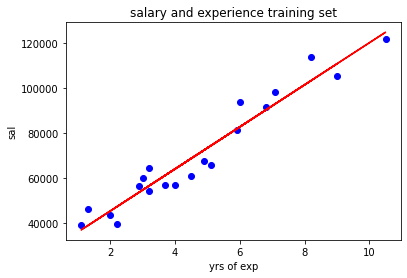

In [19]:
# HERE THROUGH GRAPHICAL REPRESENTATION WE SEE HOW THE TRAIN DATA LIES AROUND THE BEST FIT LINE


plt.scatter(X_train,y_train,color="blue")
plt.plot(X_train,lr.predict(X_train),color="red")
plt.title("salary and experience training set")
plt.xlabel("yrs of exp")
plt.ylabel("sal")
plt.show()

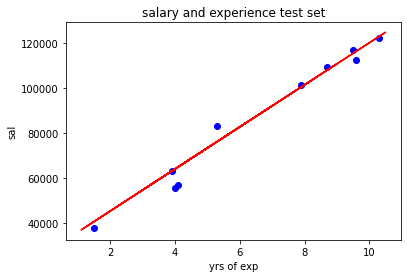

In [20]:
# HERE THROUGH GRAPHICAL REPRESENTATION WE SEE HOW THE TEST DATA LIES AROUND THE BEST FIT LINE

plt.scatter(x_test,y_test,color="blue")
plt.plot(X_train,lr.predict(X_train),color="red")
plt.title("salary and experience test set")
plt.xlabel("yrs of exp")
plt.ylabel("sal")
plt.show()

In [22]:
# WE CALCULATE THE ERROR (DISTANCE BETWEEN ACTUAL TEST DATA AND THE BEST FIT LINE)

from sklearn import metrics
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_pred))
print("Root of Mean Squared Error", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error 3426.4269374307078
Mean Squared Error 21026037.329511296
Root of Mean Squared Error 4585.4157204675885


Mean absolute error (MAE)

The MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction. It measures accuracy for continuous variables. The equation is given in the library references. Expressed in words, the MAE is the average over the verification sample of the absolute values of the differences between forecast and the corresponding observation. The MAE is a linear score which means that all the individual differences are weighted equally in the average.

Root mean squared error (RMSE)

The RMSE is a quadratic scoring rule which measures the average magnitude of the error. The equation for the RMSE is given in both of the references. Expressing the formula in words, the difference between forecast and corresponding observed values are each squared and then averaged over the sample. Finally, the square root of the average is taken. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE is most useful when large errors are particularly undesirable.

The MAE and the RMSE can be used together to diagnose the variation in the errors in a set of forecasts. The RMSE will always be larger or equal to the MAE; the greater difference between them, the greater the variance in the individual errors in the sample. If the RMSE=MAE, then all the errors are of the same magnitude

Both the MAE and RMSE can range from 0 to ∞. They are negatively-oriented scores: Lower values are better.

